In [15]:
from autogluon.tabular import TabularDataset, TabularPredictor
import numpy as np
import math

In [16]:
train_data = TabularDataset(f'Data/phil_rangedata_train.csv')
train_data.head()

,initial_SOC,final_SOC,altitude,avg_speed,total_distance
0,100.000031,100.000031,-3.061713,7.642350,4585.410159
1,100.000031,97.254936,-15.727699,10.868607,19563.491967
2,100.000031,82.745125,16.742852,19.137057,62941.779735
3,100.000031,82.745125,16.898911,19.140113,62970.972443
4,62.745117,61.960804,10.806161,10.810055,6486.032991


In [17]:
label = 'final_SOC'
train_data[label].describe()

count    446.000000
mean      63.703529
std       25.232615
min       10.588239
25%       44.705896
50%       69.411789
75%       82.745125
max      100.000031
Name: final_SOC, dtype: float64

In [18]:
predictor = TabularPredictor(label=label,eval_metric='root_mean_squared_error').fit(
    train_data, 
    presets=['best_quality'], 
    time_limit = 60,
    verbosity=1) 

No path specified. Models will be saved in: "AutogluonModels/ag-20230421_050836/"
AutoGluon infers your prediction problem is: 'regression' (because dtype of label-column == float and many unique label-values observed).
	If 'regression' is not the correct problem_type, please manually specify the problem_type parameter during predictor init (You may specify problem_type as one of: ['binary', 'multiclass', 'regression'])


In [19]:
test_data1 = TabularDataset(f'Data/phil_rangedata_test1.csv')
test_data1[label].describe()

y_pred1 = predictor.predict(test_data1.drop(columns=[label]))


In [20]:
predictor.evaluate(test_data1, silent=True)

/home/witvoetk/anaconda3/envs/tf/lib/python3.10/site-packages/autogluon/tabular/predictor/predictor.py:1420: FutureWarning: Calling `predictor.predict_proba` when problem_type=regression will raise an AssertionError starting in AutoGluon v0.8. Please call `predictor.predict` instead.
  warnings.warn(


{'root_mean_squared_error': -3.9890543396397806,
 'mean_squared_error': -15.912554524598965,
 'mean_absolute_error': -3.0653300285034177,
 'r2': 0.9841100220405594,
 'pearsonr': 0.9978370165336024,
 'median_absolute_error': -1.8334884665624998}

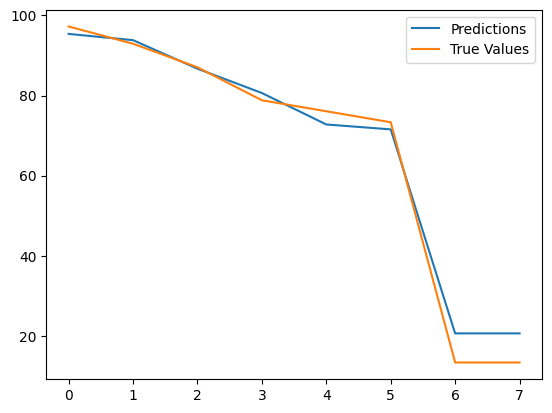

In [21]:
import matplotlib.pyplot as plt
#plot the predicted vs true values for test data1
plt.plot(y_pred1, label="Predictions")
plt.plot(test_data1[label], label="True Values")
plt.legend()
plt.show()

In [22]:
#test test data 2
test_data2 = TabularDataset(f'Data/phil_rangedata_test2.csv')
y_pred2 = predictor.predict(test_data2.drop(columns=[label]))

predictor.evaluate(test_data2, silent=True)

/home/witvoetk/anaconda3/envs/tf/lib/python3.10/site-packages/autogluon/tabular/predictor/predictor.py:1420: FutureWarning: Calling `predictor.predict_proba` when problem_type=regression will raise an AssertionError starting in AutoGluon v0.8. Please call `predictor.predict` instead.
  warnings.warn(


{'root_mean_squared_error': -1.0721812110401558,
 'mean_squared_error': -1.1495725493075353,
 'mean_absolute_error': -0.9052015953076165,
 'r2': 0.9944290804646279,
 'pearsonr': 0.9997892228284476,
 'median_absolute_error': -0.9551897056372063}

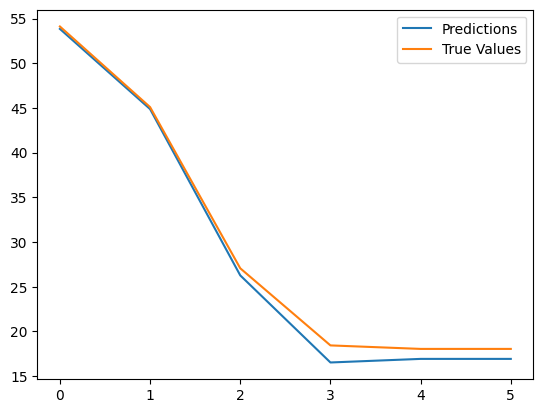

In [23]:
#plot the predicted vs true values for test data2
plt.plot(y_pred2, label="Predictions")
plt.plot(test_data2[label], label="True Values")
plt.legend()
plt.show()

In [24]:
# save each test to a csv file with 2 columns: predicted and true
import pandas as pd

df = pd.DataFrame({'predicted': y_pred1, 'true': test_data1[label]})
df.to_csv('Data/phil_rangedata_pred1.csv', index=False)

df = pd.DataFrame({'predicted': y_pred2, 'true': test_data2[label]})
df.to_csv('Data/phil_rangedata_pred2.csv', index=False)




